# Edge detection
Goal is to check several different edge detection schemes to see what works.

Notably, I am going to employ the Laplacian operator AND
Feature Synthesis Canny

In [48]:
import cv2
import pandas
import matplotlib.pyplot as plt
import numpy as np 

import sys
sys.path.append("..")
from Utility import segmentation_utils as su
import copy

In [13]:
# Load in images
img_path_basic = "/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Diagnostic_Images/Model_check-diagnostic_images_best/Au_sphere_20nm_substrate_SiO2_04.tif"
img_path_complicated = "/Users/jacobpietryga/Desktop/Academics/colloidal_crystal_ML/Images/Diagnostic_Images/Model_check-diagnostic_images_best/L-2_nM-3_au10_mixing-T_oven-T_embed-SiO2_05.tif"

img_basic = cv2.imread(img_path_basic)
img_complicated = cv2.imread(img_path_complicated)

In [8]:
# Set up filters to be used
stressed_laplace_operator = np.array([[2,-1,2],
                            [-1,-4,-1],
                            [2,-1,2]])

cv2.filter2D()


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'filter2D'
> Overload resolution failed:
>  - filter2D() missing required argument 'src' (pos 1)
>  - filter2D() missing required argument 'src' (pos 1)


0
1
3
5
7
9


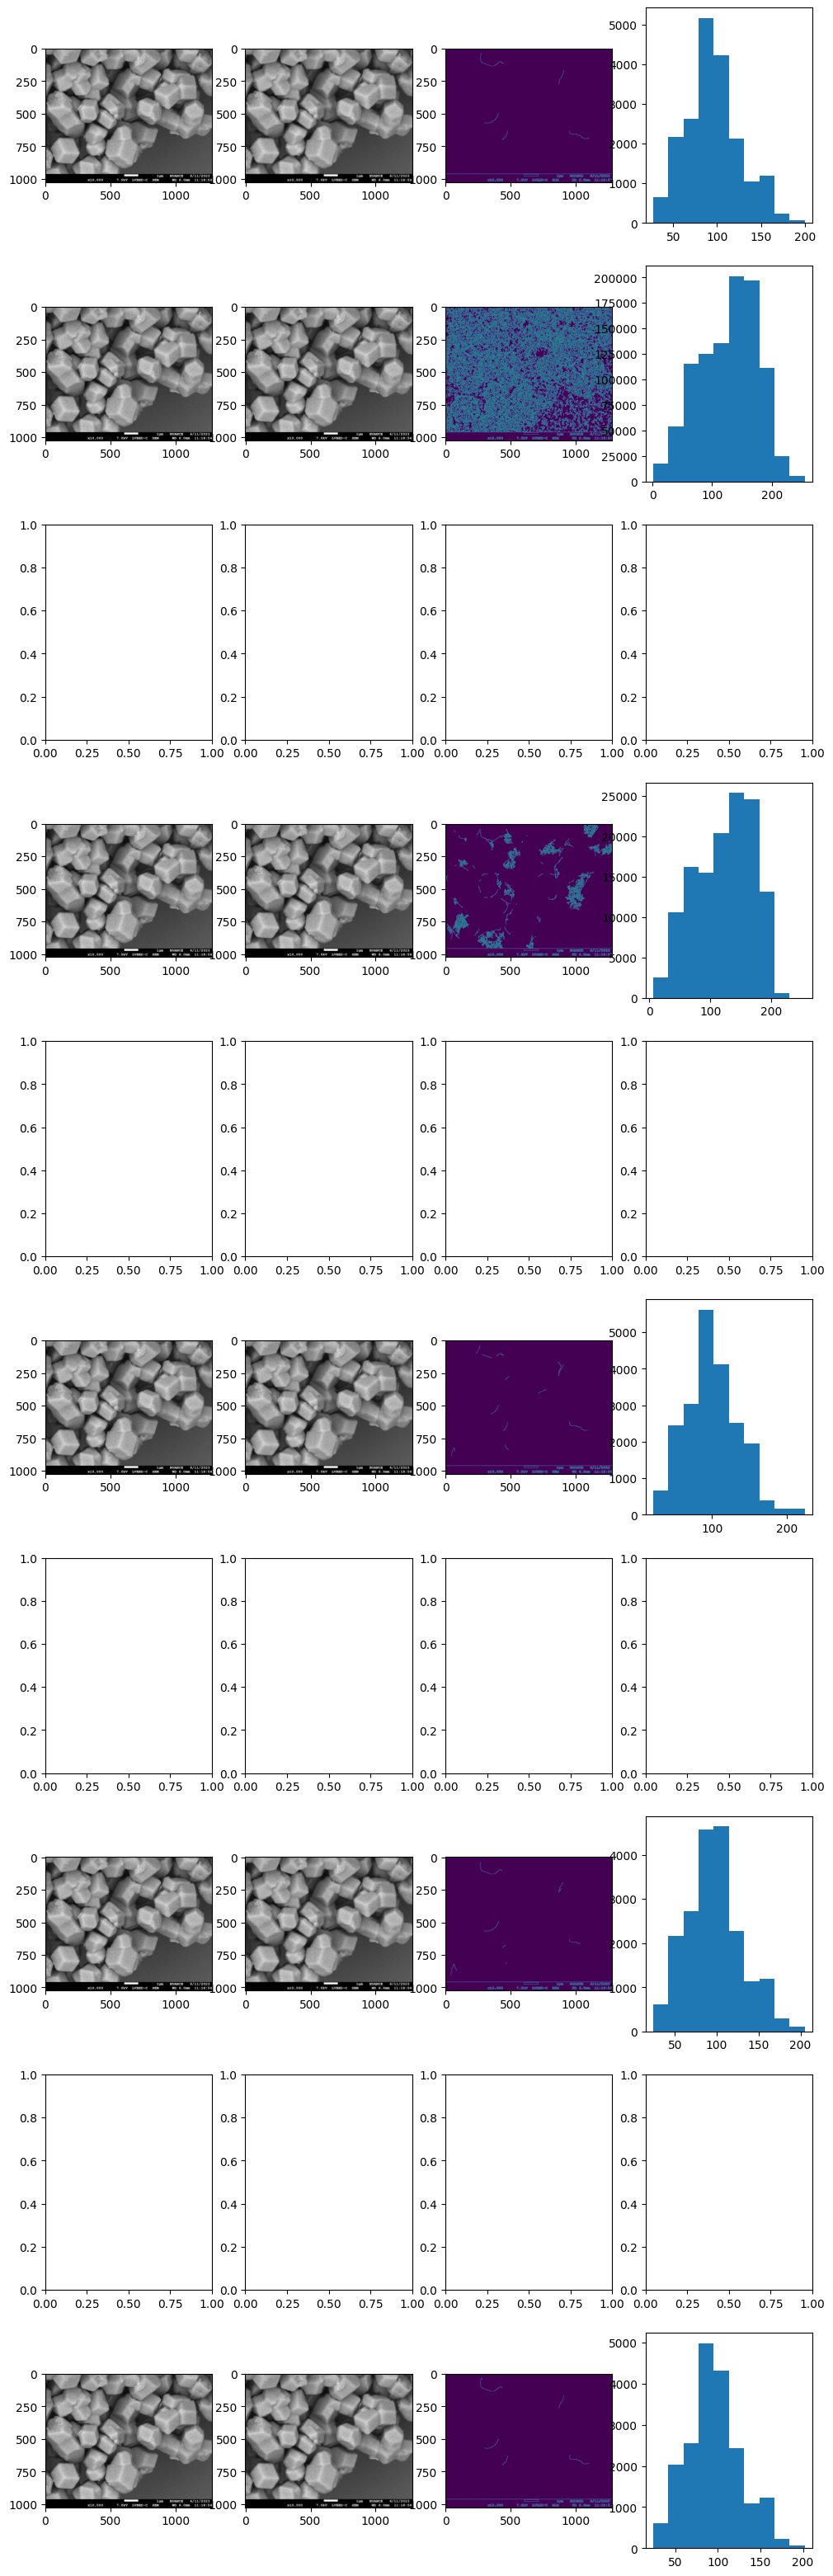

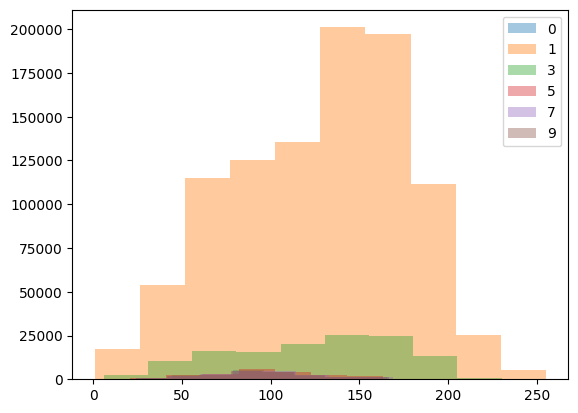

In [53]:
# Canny Notes
# Width of kernel increasing -> reduction to noise sensitivity
#

# Feature Synthesis Canny
sigma_max=10
canny_args = [(5,5),1,200,3]
sigma_arr = range(sigma_max)
fig,ax = plt.subplots(ncols=4,nrows=sigma_max,figsize=(4*3,4*sigma_max))

fig2,ax2 = plt.subplots()
for ii,sigma in enumerate(sigma_arr):
    if (ii % 2 == 0) & (ii !=0):
        continue
    ax_row = ax[ii,:]
    ax_row[0].imshow(img_complicated)

    # Apply Blur
    print(sigma)
    gb = cv2.GaussianBlur(img_complicated,(sigma,sigma),1.8)
    ax_row[1].imshow(gb)

    # Apply Canny
    canny = cv2.Canny(gb,*canny_args[1:]
                              )
    
    ax_row[2].imshow(canny)

    # Check histogram of identified edges
    canny_mask = canny.astype(bool)
    edge_pixels = copy.deepcopy(gb)
    edge_pixels[~canny_mask] = 0
    edge_pixels.flatten()
    ax_row[3].hist(edge_pixels[edge_pixels != 0])
    pixel_values = edge_pixels[edge_pixels != 0]
    np.mean()
    ax2.hist(edge_pixels[edge_pixels != 0],alpha=.4,label=ii)

ax2.legend()


1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39


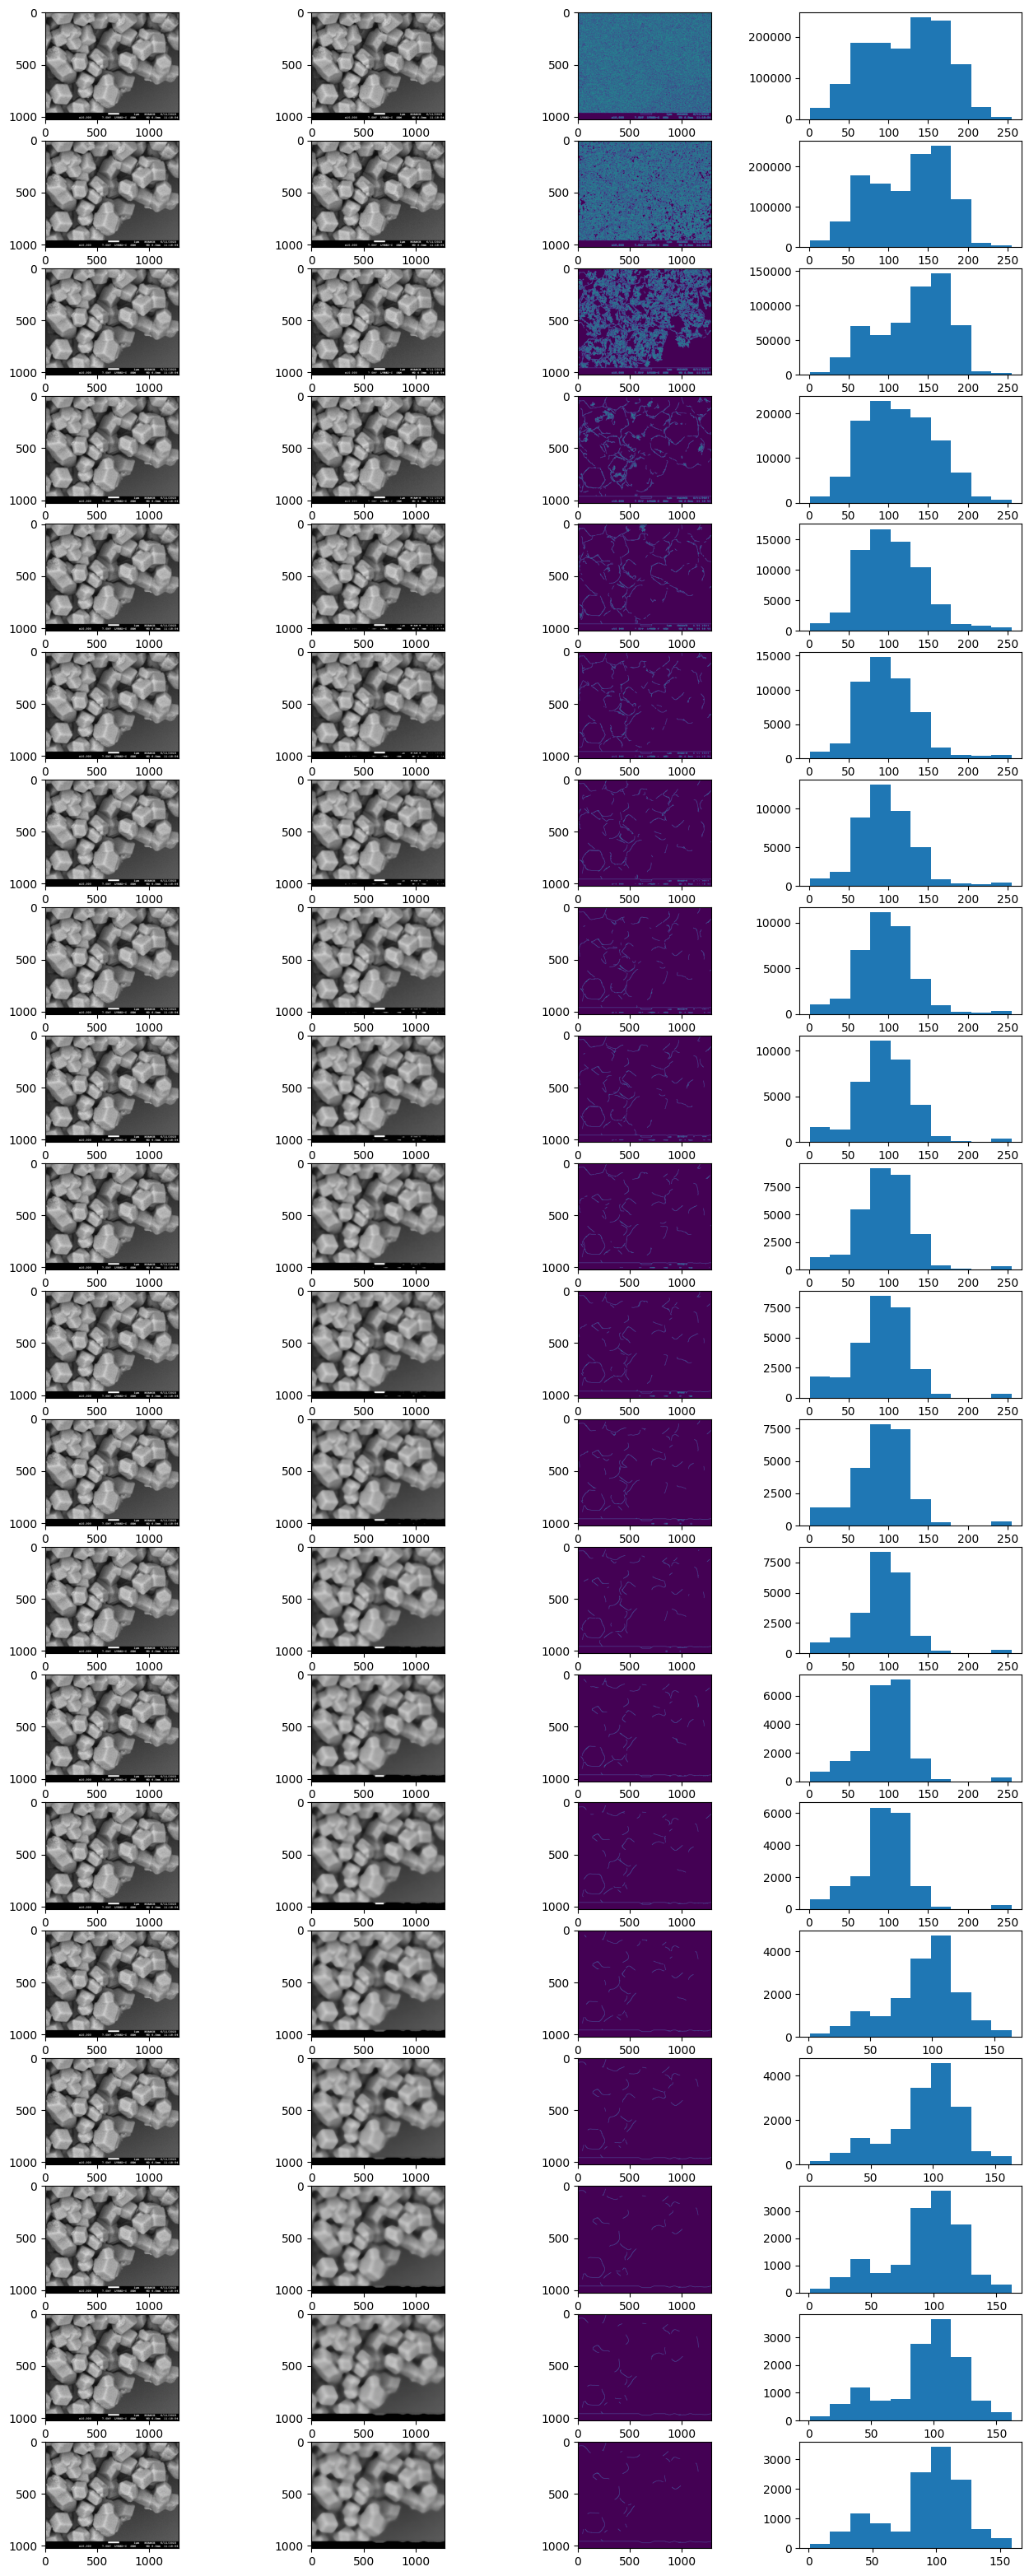

In [51]:
# Canny Notes
# Width of kernel increasing -> reduction to noise sensitivity
#
canny_args = [(5,5),1,100,3]
# Median Blur
kernel_max=40
kernel_arr = range(kernel_max)
kernel_arr = [k for k in kernel_arr if (k%2) == 1]
fig,ax = plt.subplots(ncols=4,nrows=len(kernel_arr),figsize=(4*4,4*sigma_max))
for ii,kernel in enumerate(kernel_arr):
    ax_row = ax[ii,:]
    ax_row[0].imshow(img_complicated)

    # Apply Blur
    print(kernel)
    mb = cv2.medianBlur(img_complicated,kernel)
    ax_row[1].imshow(mb)

    # Apply Canny
    canny = cv2.Canny(mb,*canny_args[1:]
                              )
    
    ax_row[2].imshow(canny)

    # Check histogram of identified edges
    canny_mask = canny.astype(bool)
    edge_pixels = copy.deepcopy(mb)
    edge_pixels[~canny_mask] = 0
    edge_pixels.flatten()
    ax_row[3].hist(edge_pixels[edge_pixels != 0])
